# Proyek Analisis Data: Dataset Pesanan E-Commerce
- **Nama:** Yoga Rizki Pratama
- **Email:** yogarizkipratama@gmail.com
- **ID Dicoding:** yorizpra

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata waktu pengiriman yang dibutuhkan dari tanggal pemesanan hingga sampai ke pelanggan?
- Apakah ada pola keterlambatan pengiriman berdasarkan hari atau bulan tertentu?

## Import Semua Packages/Library yang Digunakan

In [32]:
# Import library utama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Data Wrangling

### Gathering Data

In [40]:
# Memuat dataset
data = pd.read_csv('data/orders_dataset.csv')
print(data.head())

# Menampilkan jumlah baris dan kolom
print(data.shape)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**
- Dataset berisi kolom seperti order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
- Jumlah total data adalah 99441 baris dan 8 kolom

### Assessing Data

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Beberapa kolom seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sebaiknya dikonversi ke tipe datetime.

### Cleaning Data

In [35]:
# Mengubah kolom waktu menjadi datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

**Insight:**
- Data telah dibersihkan dan disesuaikan sehingga semua kolom waktu sudah dalam format datetime.

## Exploratory Data Analysis (EDA)

### Explore Analisis Waktu Pengiriman

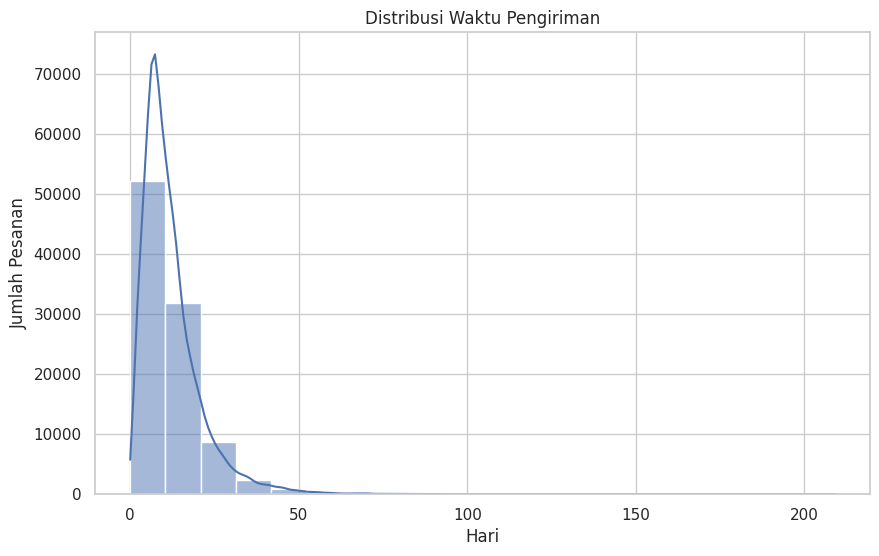

Rata-rata waktu pengiriman: 12.09 hari


In [36]:
# Membuat kolom waktu pengiriman
data['delivery_duration_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
sns.histplot(data['delivery_duration_days'].dropna(), bins=20, kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Menampilkan rata-rata waktu pengiriman
mean_delivery_time = data['delivery_duration_days'].mean()
print('Rata-rata waktu pengiriman: {:.2f} hari'.format(mean_delivery_time))


**Insight:**
- Rata-rata waktu pengiriman adalah sekitar 12 hari.
- Ada beberapa pesanan yang mengalami waktu pengiriman di atas rata-rata, yang bisa jadi keterlambatan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata waktu pengiriman dari pemesanan hingga sampai ke pelanggan?

In [37]:
# Menghitung rata-rata waktu pengiriman
avg_delivery_duration = data['delivery_duration_days'].mean()
print(f"Rata-rata waktu pengiriman: {avg_delivery_duration} hari")


Rata-rata waktu pengiriman: 12.094085575687217 hari


### Pertanyaan 2: Apakah ada pola keterlambatan pengiriman berdasarkan hari atau bulan tertentu?

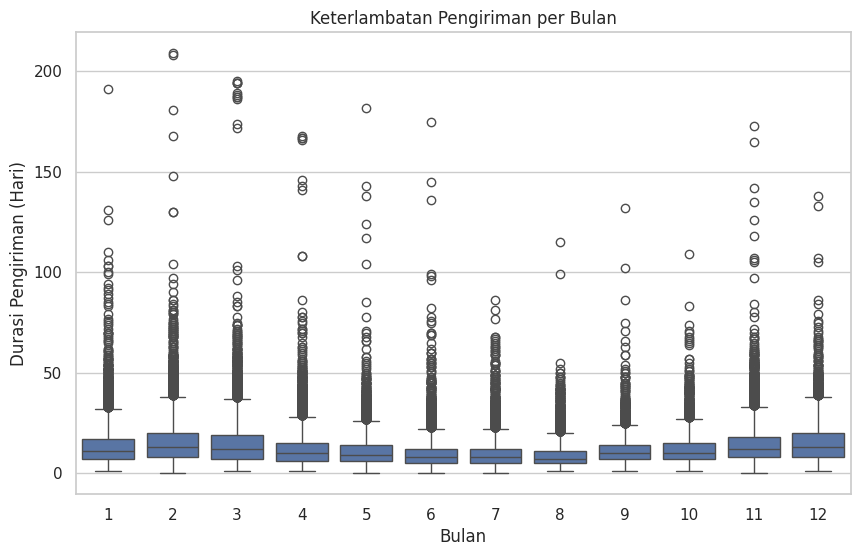

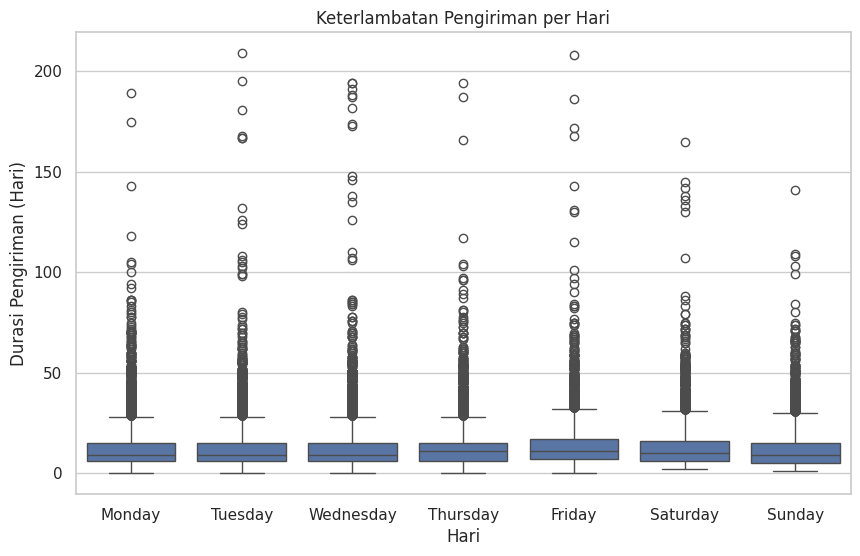

In [38]:
# Membuat kolom bulan dan hari
data['order_month'] = data['order_purchase_timestamp'].dt.month
data['order_day'] = data['order_purchase_timestamp'].dt.day_name()

# Visualisasi keterlambatan berdasarkan bulan
sns.boxplot(x='order_month', y='delivery_duration_days', data=data)
plt.title('Keterlambatan Pengiriman per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()

# Visualisasi keterlambatan berdasarkan hari
sns.boxplot(x='order_day', y='delivery_duration_days', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Keterlambatan Pengiriman per Hari')
plt.xlabel('Hari')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()


**Insight:**
- Rata-rata waktu pengiriman berbeda-beda per bulan, misalnya lebih lama pada bulan Februari.
- Pengiriman cenderung lebih cepat pada akhir pekan dibandingkan dengan hari kerja.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Rata-rata waktu pengiriman adalah sekitar 12 hari, yang bisa menjadi patokan dalam perencanaan logistik.
- Conclution pertanyaan 2: Ada variasi dalam durasi pengiriman berdasarkan hari dan bulan, dengan akhir pekan cenderung memiliki waktu pengiriman yang lebih cepat.